# Исследование данных о российском кинопрокате

## Описание проекта

Заказчик исследования — Министерство культуры Российской Федерации.

Задача исследовани - изучить рынок российского кинопроката и выявить текущие тренды.

Цели исследования:
1. Выявить текущие тренды киноиндустрии;
2. Определить уровень успешности фильмов с государственной поддержкой.

В процессе исследования будут проанализированы открытые данные Министерства культуры.
Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск. 

## Описание данных

* title — название фильма;
* pu_number — номер прокатного удостоверения;
* show_start_date — дата премьеры фильма;
* type — тип фильма;
* film_studio — студия-производитель;
* production_country — страна-производитель;
* director — режиссёр;
* producer — продюсер;
* age_restriction — возрастная категория;
* refundable_support — объём возвратных средств государственной поддержки;
* nonrefundable_support — объём невозвратных средств государственной поддержки;
* financing_source — источник государственного финансирования;
* budget — общий бюджет фильма;
* ratings — рейтинг фильма на КиноПоиске;
* genres — жанр фильма;
* box_office - сборы в рублях.

### Общая информация о датафреймах. Объединение их в один датафрейм 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
try:
    data_1 = pd.read_csv('//Users/Elena/Desktop/mkrf_movies.csv')
except:
    data_1 = pd.read_csv('/Documents/mkrf_movies.csv')
data_1.head(10)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
5,Остановился поезд,111013816,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма
6,Любовь и голуби,111007013,2013-10-18T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия"
7,Любовь и сигареты,221074614,2014-12-29T12:00:00.000Z,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"мюзикл,мелодрама,комедия"
8,Отпетые мошенники.,121011416,2016-05-05T12:00:00.000Z,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.0,"комедия,криминал"
9,Отпуск за свой счет,111019114,2014-12-01T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия"


Датасет "mkrf_movies".

In [3]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

Информация о датасете "mkrf_movies".

In [4]:
try:
    data_2 = pd.read_csv('//Users/Elena/Desktop/mkrf_shows.csv')
except:
    data_2 = pd.read_csv('/Documents/mkrf_shows.csv')
data_2.head(10)

,puNumber,box_office
0,111000113,2.450000e+03
1,111000115,6.104000e+04
2,111000116,1.530300e+08
3,111000117,1.226096e+07
4,111000118,1.636841e+08
5,111000119,4.293650e+06
6,111000212,2.000000e+02
7,111000216,3.555670e+05
8,111000313,7.100000e+02
9,111000314,1.607970e+06


In [5]:
pd.options.display.float_format = '{:,.1f}'.format
display(data_2)

,puNumber,box_office
0,111000113,"2,450.0"
1,111000115,"61,040.0"
2,111000116,"153,030,013.4"
3,111000117,"12,260,956.0"
4,111000118,"163,684,057.8"
...,...,...
3153,224014814,"1,530.0"
3154,224021411,"9,270.0"
3155,224022410,400.0
3156,224023210,360.0


Датасет "mkrf_shows".

In [6]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


Информация о датасете "mkrf_shows".

In [7]:
data_1['puNumber'] = data_1['puNumber'].astype('str')
data_2['puNumber'] = data_2['puNumber'].astype('str')

Для объединения двух таблиц в одну по общему столбцу "puNumber" необходимо привети его в обоих таблицах к одному типу данных.
Номер прокатного удостоверения не является исчесляемой категорией, поэтому переводим все значения в формат "str".

In [8]:
data = data_1.merge(data_2, on='puNumber', how='outer')
display(data)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7481,Сад художника: Американский импрессионизм,126008019,2019-12-23T12:00:00.000Z,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7482,Звериная ярость,121037819,2019-12-24T12:00:00.000Z,Художественный,"Дэниел Гродник Продакшнз, Вандерфилм Медиа Кор...",США,Ник Пауэлл,"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.4,"боевик,триллер",NaN
7483,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28T12:00:00.000Z,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7484,"Машины песенки. Серия ""Испанские мотивы""",124010619,2019-12-30T12:00:00.000Z,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",А.Беляев,Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Объеденённый по столбцу "puNumber" датасет.

In [9]:
data = data.rename(columns={'puNumber':'pu_number'})
data.head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


Пререименую столбец "puNumber" для более аккуртаного представления данных.

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   pu_number              7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

### Предобработка данных

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   pu_number              7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

Информация по объединённой таблице.
Значения в стобце "pu_number" стали одного типа.
Вероятнее всего при выгрузке данных произошла ошибка в типах некоторых данных.

In [12]:
data['show_start_date'] = pd.to_datetime(data['show_start_date'], format = '%Y-%m-%d')
data['ratings']=pd.to_numeric(data['ratings'],errors='coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7486 non-null   object             
 1   pu_number              7486 non-null   object             
 2   show_start_date        7486 non-null   datetime64[ns, UTC]
 3   type                   7486 non-null   object             
 4   film_studio            7468 non-null   object             
 5   production_country     7484 non-null   object             
 6   director               7477 non-null   object             
 7   producer               6918 non-null   object             
 8   age_restriction        7486 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

Перевела значения столбца "show_start_date" в формат даты.
Значения в столбце "ratings" перевела в числовые. Некорректные значения заменила на NaN.

In [13]:
data.isnull().sum()

title                       0
pu_number                   0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   996
genres                    976
box_office               4328
dtype: int64

In [14]:
data.isnull().sum()/len(data)*100

title                    0.0
pu_number                0.0
show_start_date          0.0
type                     0.0
film_studio              0.2
production_country       0.0
director                 0.1
producer                 7.6
age_restriction          0.0
refundable_support      95.6
nonrefundable_support   95.6
budget                  95.6
financing_source        95.6
ratings                 13.3
genres                  13.0
box_office              57.8
dtype: float64

Посчитаю количество пропусков в таблице.
Наибольшее количество значений отсутсвуют в столбцах с информацией о размере возвратных и не возвратных денежных средств, бюджете  и источнике финансирования.
Так же очень много данных пропущено в столбце с информацией о кассовых сборах.

In [15]:
data.duplicated().sum()

0

Явные дубликаты отсутсвуют в сформированном датафрейме.

In [16]:
data['pu_number'].duplicated().sum()

2

Тем не менее, если проверить таблицу на наличие неявных дубликатов по значениям прокатного удостоверения, то выдим, что присутствует 2 дубликата.
Номер прокатного удостоверения является уникальным значением и не может быть одинаковым для нескольких фильмов.

In [17]:
data = data.drop_duplicates(subset=['pu_number'], keep='first')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7484 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7484 non-null   object             
 1   pu_number              7484 non-null   object             
 2   show_start_date        7484 non-null   datetime64[ns, UTC]
 3   type                   7484 non-null   object             
 4   film_studio            7466 non-null   object             
 5   production_country     7482 non-null   object             
 6   director               7475 non-null   object             
 7   producer               6916 non-null   object             
 8   age_restriction        7484 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

Удалю эти 2 дубликата в столбце "pu_number". Их отсутствие не повлияет на репрезентативность выборки.

In [18]:
data['film_studio'] = data['film_studio'].fillna('неизвестно')
data['production_country'] = data['production_country'].fillna('неизвестно')
data['director'] = data['director'].fillna('неизвестно')
data['producer'] = data['producer'].fillna('неизвестно')

Для удобства дальнейшего анализа заменю пропуски в столбцах "film_studio", "director", "producer", "production_country" на значение "неизвестно".

In [19]:
data['title'].str.lower()
data.head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,неизвестно,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


Привела названия фильмов к единому нижнему регистру.

In [20]:
data['type'].str.strip()

0       Художественный
1       Художественный
2       Художественный
3       Художественный
4       Художественный
             ...      
7481            Прочие
7482    Художественный
7483    Художественный
7484      Анимационный
7485      Анимационный
Name: type, Length: 7484, dtype: object

Удалила пробелы в столбце "type".

In [21]:
data['production_country'] = data['production_country'].replace('-', ',')
data.head(10)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,неизвестно,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
5,Остановился поезд,111013816,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,неизвестно,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма,NaN
6,Любовь и голуби,111007013,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,неизвестно,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия","2,700.0"
7,Любовь и сигареты,221074614,2014-12-29 12:00:00+00:00,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"мюзикл,мелодрама,комедия",NaN
8,Отпетые мошенники.,121011416,2016-05-05 12:00:00+00:00,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.0,"комедия,криминал",NaN
9,Отпуск за свой счет,111019114,2014-12-01 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,неизвестно,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия",NaN


In [22]:
data.describe()

,refundable_support,nonrefundable_support,budget,ratings,box_office
count,332.0,332.0,332.0,"6,488.0","3,158.0"
mean,"11,864,457.8","48,980,988.9","127,229,716.7",6.5,"76,478,696.2"
std,"24,916,555.3","59,980,117.9","188,588,333.1",1.1,"240,353,122.8"
min,0.0,0.0,0.0,1.0,0.0
25%,0.0,"25,000,000.0","42,000,000.0",5.9,"86,239.0"
50%,0.0,"30,000,000.0","68,649,916.0",6.6,"2,327,987.5"
75%,"15,000,000.0","40,375,000.0","141,985,319.5",7.2,"23,979,671.0"
max,"180,000,000.0","400,000,000.0","2,305,074,303.0",9.2,"3,073,568,690.8"


Выведу описательную статистику по сформированному датафрейму.
Некоторые выводы:
1. Максимальный рейтинг фильма в датафрейме 9,2, минимальный - 1,1;
2. Присутствуют фильмы не финансировуемые государством. Возможно, значения в данных столбцах являются конфиденциальной информацией или просто были потеряны при выгрузке данных.;
3. Наибольшие кассовые сборы одного из фильмов составили 3 млрд 70 млн. руб. Это очень хорошие цифры для отечественного кинематогрофа;
4. Большая часть значений выручки от проката менее 10 млн. руб. Учитывая, что прокат фильмов был запущен по стране с населением 146 млн. человек, большенство фильмов представленных в датафрейме не очень популярные и успешные;
5. Средний объём финансовой поддержки государства составлет 100 млн. руб. Это в 10 раз больше, чем большенство фильмов собирают в прокате.

In [23]:
data_new = (data['budget'] == 0) & (~data['refundable_support'].isna() | (~data['nonrefundable_support'].isna()))
data.loc[data_new, 'budget'] = data.loc[data_new, 'refundable_support'] + data.loc[data_new, 'nonrefundable_support']
data.loc[data_new, ['budget', 'refundable_support', 'nonrefundable_support']]

,budget,refundable_support,nonrefundable_support
2053,"23,000,000.0",0.0,"23,000,000.0"
2058,"75,000,000.0",0.0,"75,000,000.0"
2472,"80,000,000.0","10,000,000.0","70,000,000.0"
2532,"20,000,000.0","20,000,000.0",0.0
2615,"160,000,000.0","60,000,000.0","100,000,000.0"
2684,"59,000,000.0",0.0,"59,000,000.0"
2788,"35,000,000.0",0.0,"35,000,000.0"
2874,"6,000,000.0",0.0,"6,000,000.0"
3047,"70,000,000.0","19,000,000.0","51,000,000.0"
3565,"250,000,000.0",0.0,"250,000,000.0"


Нулевые значения в столбце "budget" некорректны, если заполнен хотя бы один из столбцов "refundable_support" и "nonrefundable_support".
Заполню нулевые значения в столбце "budget" суммой "refundable_support" и "nonrefundable_support" (сумма возвратных и невозвратных государственных средств).

In [24]:
data['year'] = data['show_start_date'].dt.year
data.head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN,2015
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,неизвестно,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN,2016
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2015


Создала столбец с информацией о годе проката. Выделила год из даты премьеры фильма.

In [25]:
data_director = data['director'].str.split(',',expand=True)
data['director_name'] = data_director[0]
data_genres = data['genres'].str.split(',',expand=True)
data['genres_main'] = data_genres[0]
data.head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,director_name,genres_main
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN,2015,Кевин Костнер,боевик
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,неизвестно,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN,2016,Е.Матвеев,драма
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2015,Тимур Бекмамбетов,фантастика


Создала два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы вошли первые значения из списка режиссёров и жанров соответственно.

In [26]:
data['total_budget'] = data['refundable_support'] + data['nonrefundable_support']
data['total_budget_percent'] = data['total_budget'] / data['budget']
data['refundable_support_percent'] = data['refundable_support'] / data['budget']
data['nonrefundable_support_percent'] = data['nonrefundable_support'] / data['budget']
data.describe()

,refundable_support,nonrefundable_support,budget,ratings,box_office,year,total_budget,total_budget_percent,refundable_support_percent,nonrefundable_support_percent
count,332.0,332.0,332.0,"6,488.0","3,158.0","7,484.0",332.0,332.0,332.0,332.0
mean,"11,864,457.8","48,980,988.9","131,422,395.8",6.5,"76,478,696.2","2,014.6","60,845,446.7",0.5,0.1,0.5
std,"24,916,555.3","59,980,117.9","187,148,242.7",1.1,"240,353,122.8",3.0,"72,755,459.5",0.2,0.1,0.2
min,0.0,0.0,"6,000,000.0",1.0,0.0,"2,010.0","3,000,000.0",0.0,0.0,0.0
25%,0.0,"25,000,000.0","45,524,799.5",5.9,"86,239.0","2,012.0","25,333,750.0",0.4,0.0,0.3
50%,0.0,"30,000,000.0","71,196,901.5",6.6,"2,327,987.5","2,015.0","35,000,000.0",0.6,0.0,0.5
75%,"15,000,000.0","40,375,000.0","150,000,000.0",7.2,"23,979,671.0","2,017.0","60,000,000.0",0.7,0.1,0.6
max,"180,000,000.0","400,000,000.0","2,305,074,303.0",9.2,"3,073,568,690.8","2,019.0","500,000,000.0",1.0,1.0,1.0


Создам столбец "total_budget", который отображает общий объем финансовой поддержки.
Столбец "total_budget_percent" содержит информацию об доле фильмов с государственной поддержкой.
Столбец "refundable_support_percent" отобраает информацию о доле возвратных денежных средств в совокупном бюджете на фильм.
Столбец "nonrefundable_support_percent" отобраает информацию о доле невозвратных денежных средств в совокупном бюджете на фильм.
Доля государственного участия в создании большенства фильмов (75%) составляет 66%.
Это очень большой % для коммерческой отрасли, которая должна сама себя окупать.
У кинопроизводства тереся стимул для продвижения и окупаемости кинопродукта. 
Среднее значение государственного финансирования фильма равно 130 млн. руб.
При этом максимальный размер невозвратных средств может достигать 400 млн. руб.
Возможно, это боевики, фантастика или другие жанры, требующие значительных вложений для создания спецэффектов.

### Исследовательский анализ данных


In [27]:
data_year = data.pivot_table(index='year', values=['title', 'box_office'], aggfunc='count')
data_year

,box_office,title
year,,
2010,105,983
2011,109,622
2012,128,593
2013,184,630
2014,279,807
2015,465,705
2016,526,818
2017,357,505
2018,475,891


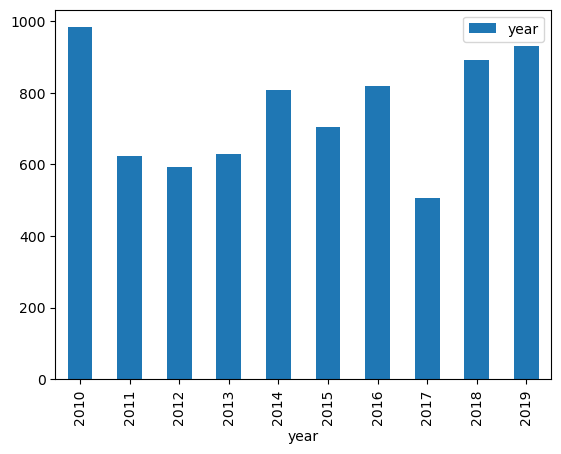

In [28]:
number = data.groupby('year').agg({'year': 'count'})
number.plot(kind = 'bar');

In [29]:
data_year.describe()

,box_office,title
count,10.0,10.0
mean,315.8,748.4
std,176.6,160.5
min,105.0,505.0
25%,142.0,624.0
50%,318.0,756.0
75%,472.5,872.8
max,530.0,983.0


Для наглядного представления данных и определения сколько фильмов ежегодно (общие данные), сведу данные в сводную таблицу и построю гистограмму.
Наибольшее количество фильмов, судя по представленным для анализа данным, выходили в 2010, 2014, 2018, 2019 годах (983, 807, 891, 930 ед. соответственно).
Существенный "провал" наблюдается в 2017 году - 505 фильмов.
Могу предположить, что в данный год был урезан объем бюджета, выделяемый на отечественный кинематограф.

In [30]:
data_year['part'] = data_year['box_office'] / data_year['title']
data_year['part'].mean()
data_year

,box_office,title,part
year,,,
2010,105,983,0.1
2011,109,622,0.2
2012,128,593,0.2
2013,184,630,0.3
2014,279,807,0.3
2015,465,705,0.7
2016,526,818,0.6
2017,357,505,0.7
2018,475,891,0.5


In [31]:
data_year['part'].mean()

0.42482353140489043

Доля данных, содержащая информацию о прокатах в кинотеатрах составляет 42%.
Возможно, не все прокатные удостоверения давали право на показ фильмов к китотетрах.
Исходя из представленных данных, часть фильмов была показана по ТВ или так и не вышли в итоге в широкий прокат. 

In [32]:
data_year.describe()

,box_office,title,part
count,10.0,10.0,10.0
mean,315.8,748.4,0.4
std,176.6,160.5,0.2
min,105.0,505.0,0.1
25%,142.0,624.0,0.2
50%,318.0,756.0,0.4
75%,472.5,872.8,0.6
max,530.0,983.0,0.7


Максимальное количество фильмов, вышедших в один год составляет 983 ед. Могу предположить, что именно государственная поддержка помогла достигнуть столь высоких показателей.
В среднем за период с 2010 по 2019 в год выходило по 748 фильмов.

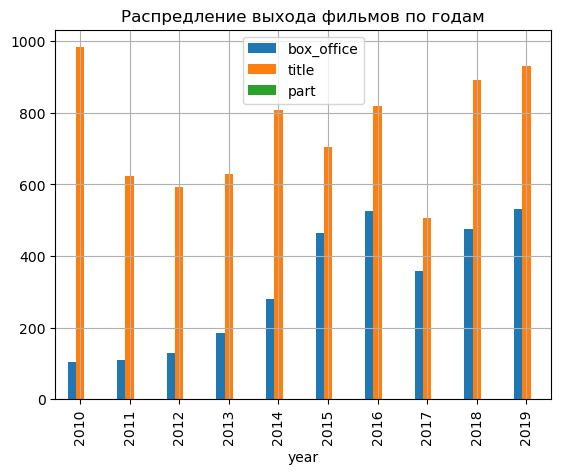

In [33]:
data_year.plot(kind = 'bar', grid=True)
plt.title('Распредление выхода фильмов по годам');

Объединила в одной диаграмме количество релизов фильмов и объем кассовых сборов по годам.
Ежегодный объем релизов был проанализирован ранее.
Предлагаю обратить внимание на резкий рост кассовых сборов с 2014, 2015 годов.
Возможно, это связано с ростом популярности кинотеатров, выходом интересных фильмов, использованием 3D технологий, появлением и ростом популярности он-лайн кинотеатров.

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

In [34]:
dinemic = data.groupby('year')['box_office'].agg(['sum','count', 'mean', 'min', 'max'])
dinemic

,sum,count,mean,min,max
year,,,,,
2010,"2,428,654.0",105,"23,130.0",0.0,"1,446,400.0"
2011,"14,102,765.0",109,"129,383.2",125.0,"11,618,085.0"
2012,"6,955,423.0",128,"54,339.2",0.0,"2,311,220.0"
2013,"29,799,706.2",184,"161,954.9",0.0,"19,957,031.5"
2014,"7,444,951,859.2",279,"26,684,415.3",0.0,"1,016,410,635.3"
2015,"39,497,365,196.4",465,"84,940,570.3",0.0,"1,658,861,425.5"
2016,"47,866,299,741.9",526,"91,000,569.9",0.0,"2,048,126,108.0"
2017,"48,563,707,217.5",357,"136,032,793.3","7,900.0","2,779,686,144.0"
2018,"49,668,403,134.3",475,"104,565,059.2","41,225.0","2,271,754,004.5"


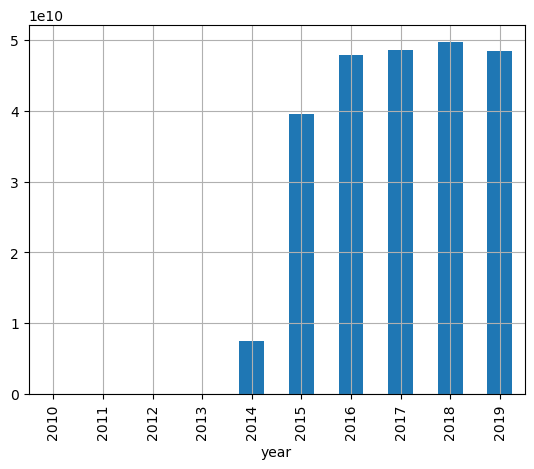

In [35]:
dinemic['sum'].plot(kind='bar', grid=True);

Ежегодно с 2014 года наблюдается рост кассовых сборов. Как было описано ранее, на это могло повлиять несколько факторов.
Минимальный размер кассовых сборов - 2 млн. 400 тыс. был в 2010 году.
Максимальный размер кассовых сборов был в 2018 году.

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

,mean,median
,box_office,box_office
year,,
2010,"23,130.0","1,700.0"
2011,"129,383.2","3,000.0"
2012,"54,339.2","5,660.0"
2013,"161,954.9","3,522.5"
2014,"26,684,415.3","18,160.0"
2015,"84,940,570.3","4,920,933.0"
2016,"91,000,569.9","3,846,679.4"
2017,"136,032,793.3","9,968,340.0"


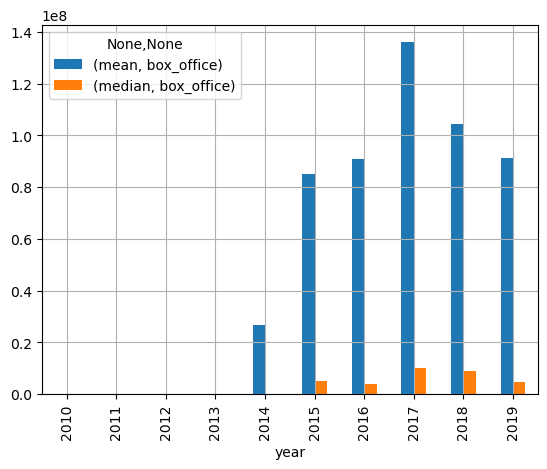

In [36]:
money = data.pivot_table(index='year', values='box_office', aggfunc=['mean', 'median'])
money.plot(kind = 'bar', grid=True)
money

Медианный значения сильно отличаются от средних значений суммы сборов за каждый год.
Возможно, это связано с "выбросами" - очень кассовыми фильмами, которые попали в выборку и повлияли я значения среднего.

In [37]:
age = data.query('year >= 2015').groupby('age_restriction')['box_office'].agg(['sum', 'min', 'max'])
age

,sum,min,max
age_restriction,,,
«0+» - для любой зрительской аудитории,"809,077,426.0",0.0,"206,478,186.0"
«12+» - для детей старше 12 лет,"60,619,446,628.3",0.0,"3,073,568,690.8"
«16+» - для детей старше 16 лет,"76,034,733,643.6",0.0,"2,576,613,776.8"
«18+» - запрещено для детей,"40,759,615,572.1",600.0,"1,890,368,076.5"
«6+» - для детей старше 6 лет,"55,798,610,799.7",200.0,"2,779,686,144.0"


Наибольшие суммарные сборы наблюдаются в возрастной категории "16+". Это объяснимо: многие подростки с этого возраста начинают подрабатывать, могут самостоятельно себе позволить походы в кинотеатры. Так же следет отметить, что фильмы данной категории охватывают, пожалуй, наиболее обширную аудиторию: они интересны как подросткам 16 лет, так уже и взрослому поколению.
Чуть меньше сборы в категории "12+". Детям в этом возрасте родители уже открывают банковские карточки и выделяют денежные средства на корманные расходы.

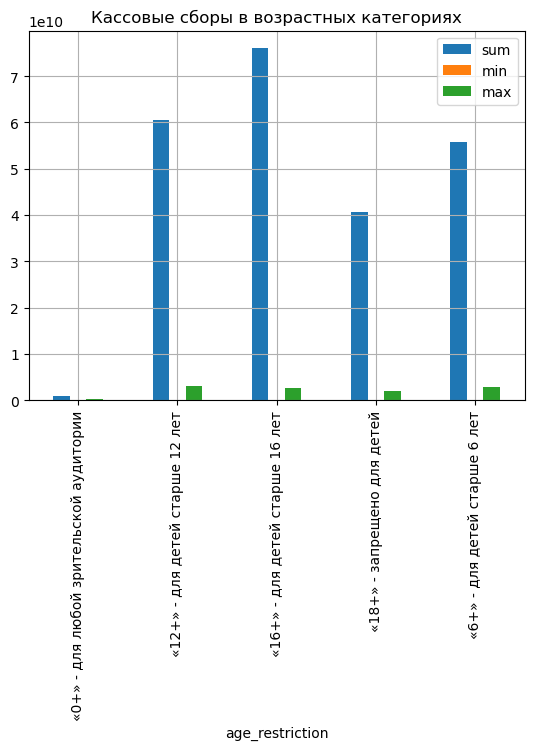

In [38]:
age.plot(kind='bar', grid=True)
plt.title('Кассовые сборы в возрастных категориях');

Далее рассмотрю динамику ежегодно.

,sum,min,max
age_restriction,,,
«0+» - для любой зрительской аудитории,"379,054,578.4",0.0,"158,025,089.1"
«12+» - для детей старше 12 лет,"13,616,082,008.9",0.0,"1,658,861,425.5"
«16+» - для детей старше 16 лет,"11,368,120,870.3",0.0,"1,486,131,019.0"
«18+» - запрещено для детей,"5,432,308,367.4","2,375.0","1,006,737,153.0"
«6+» - для детей старше 6 лет,"8,701,799,371.4",300.0,"1,646,580,645.7"


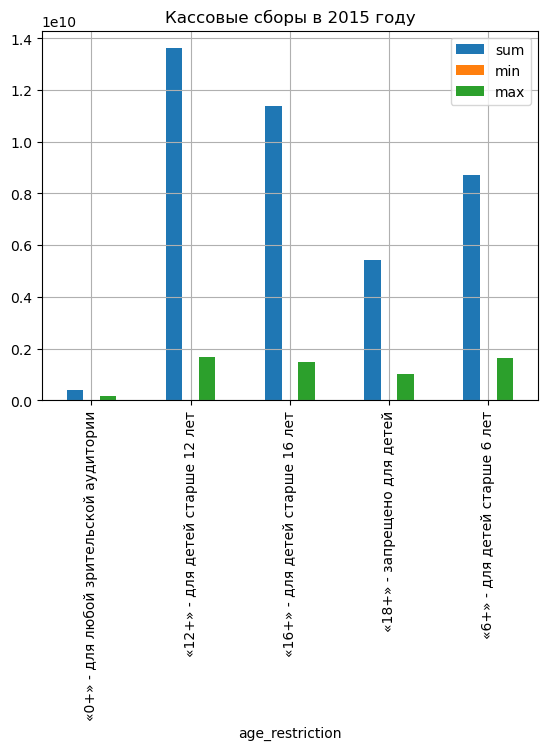

In [39]:
age_year_2015 = data.query('year == 2015').groupby('age_restriction')['box_office'].agg(['sum', 'min', 'max'])
age_year_2015.plot(kind = 'bar', grid=True)
plt.title('Кассовые сборы в 2015 году');
age_year_2015

Наибольшее количество денежных средств в прокате в 2015 году собрали фильмы с возрастными ограничениями "12+" и "16+". 
Как я уже говорила ранее, фильмы данных категорий относятся к категории "фильмы для семейного просмотра" и интересны как подросткам, так и взрослому поколению.

,sum,min,max
age_restriction,,,
«0+» - для любой зрительской аудитории,"150,228,848.7",240.0,"64,734,023.5"
«12+» - для детей старше 12 лет,"12,204,446,524.4","1,900.0","1,398,264,684.0"
«16+» - для детей старше 16 лет,"16,664,548,541.7",0.0,"1,570,380,294.0"
«18+» - запрещено для детей,"6,793,929,818.9",600.0,"1,587,516,389.0"
«6+» - для детей старше 6 лет,"12,053,146,008.2",200.0,"2,048,126,108.0"


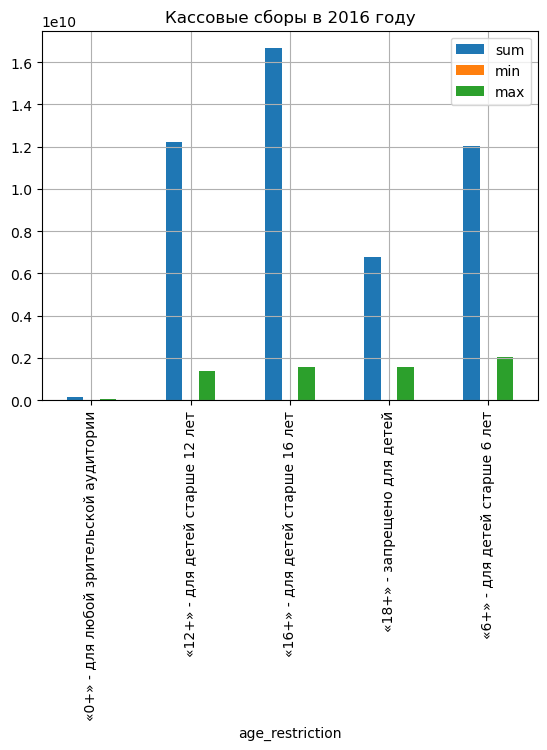

In [40]:
age_year_2016 = data.query('year == 2016').groupby('age_restriction')['box_office'].agg(['sum', 'min', 'max'])
age_year_2016.plot(kind = 'bar', grid=True)
plt.title('Кассовые сборы в 2016 году');
age_year_2016

Наибольшее количество денежных средств в прокате в 2016 году так же собрали фильмы с возрастными ограничениями "12+" и "16+", но лидирует уже категория "16+".
Возможно, это было связано с введением более жёсткой цензуры.

,sum,min,max
age_restriction,,,
«0+» - для любой зрительской аудитории,"229,598,930.0","941,788.0","206,478,186.0"
«12+» - для детей старше 12 лет,"7,851,427,660.7","7,900.0","1,655,037,688.0"
«16+» - для детей старше 16 лет,"18,745,042,900.1","161,086.0","2,118,396,119.0"
«18+» - запрещено для детей,"9,651,495,581.0","67,791.0","1,036,725,434.0"
«6+» - для детей старше 6 лет,"12,086,142,145.8","263,010.0","2,779,686,144.0"


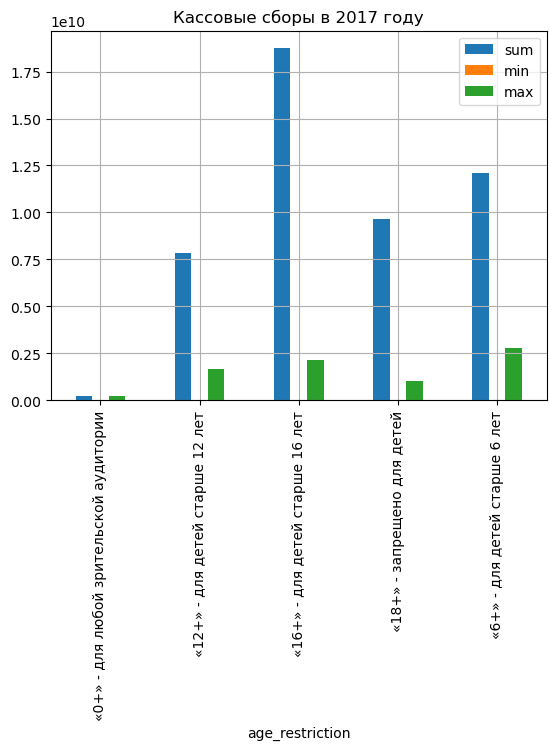

In [41]:
age_year_2017 = data.query('year == 2017').groupby('age_restriction')['box_office'].agg(['sum', 'min', 'max'])
age_year_2017.plot(kind = 'bar', grid=True)
plt.title('Кассовые сборы в 2017 году');
age_year_2017

В 2017 году так же наблюдается значительный отрыв в кассовых сборах фильмов категори "16+".

,sum,min,max
age_restriction,,,
«0+» - для любой зрительской аудитории,"32,449,002.1","107,979.0","24,176,724.1"
«12+» - для детей старше 12 лет,"14,267,291,660.7","41,225.0","2,271,754,004.5"
«16+» - для детей старше 16 лет,"16,503,602,347.0","82,506.0","1,913,257,923.1"
«18+» - запрещено для детей,"8,760,085,501.1","46,260.0","1,236,762,617.3"
«6+» - для детей старше 6 лет,"10,104,974,623.4","234,730.0","1,125,242,943.9"


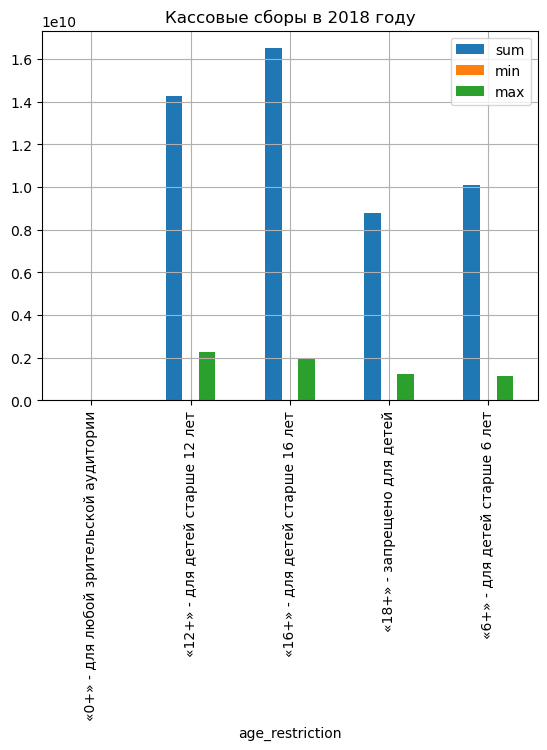

In [42]:
age_year_2018 = data.query('year == 2018').groupby('age_restriction')['box_office'].agg(['sum', 'min', 'max'])
age_year_2018.plot(kind = 'bar', grid=True)
plt.title('Кассовые сборы в 2018 году');
age_year_2018

В 2018 году категория фильмов "12+" пытается догнать по сборам фильмы "16+".

,sum,min,max
age_restriction,,,
«0+» - для любой зрительской аудитории,"17,746,066.8","81,000.0","13,779,632.3"
«12+» - для детей старше 12 лет,"12,680,198,773.7","7,175.0","3,073,568,690.8"
«16+» - для детей старше 16 лет,"12,753,418,984.6","35,413.0","2,576,613,776.8"
«18+» - запрещено для детей,"10,121,796,303.6","73,700.0","1,890,368,076.5"
«6+» - для детей старше 6 лет,"12,852,548,650.9","4,398.4","1,911,944,866.0"


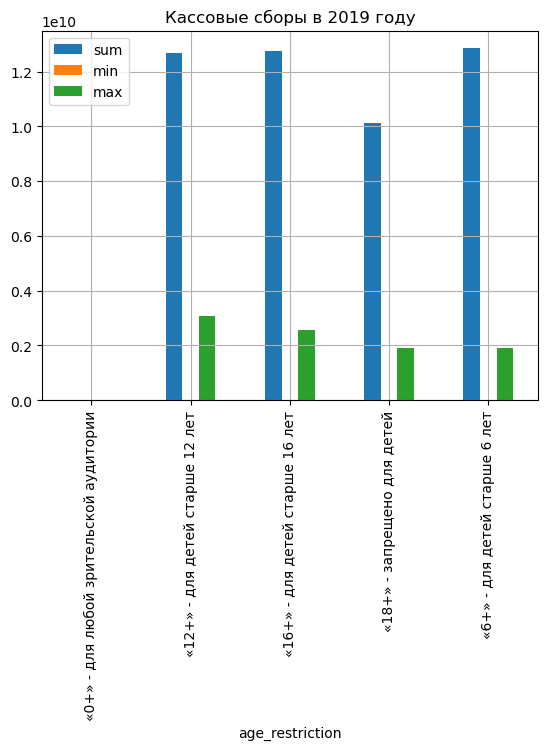

In [43]:
age_year_2019 = data.query('year == 2019').groupby('age_restriction')['box_office'].agg(['sum', 'min', 'max'])
age_year_2019.plot(kind = 'bar', grid=True)
plt.title('Кассовые сборы в 2019 году');
age_year_2019

Кассовые сборы практически по всем категориям сровнялись. Отстаёт категория фильмов "18+". Предполагаю, что это может быть связано как раз с жёстким возрастным ограничением, которое "отсекает" большую часть аудитории.

### Исследование фильмов, которые получили государственную поддержку

In [44]:
gov_data = data.query('nonrefundable_support>0 | refundable_support_percent>0')
gov_data

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,ratings,genres,box_office,year,director_name,genres_main,total_budget,total_budget_percent,refundable_support_percent,nonrefundable_support_percent
1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.0,...,8.1,"драма,мелодрама","365,353.6",2013,А.Атанесян,драма,"26,500,000.0",0.3,0.0,0.3
1448,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.0,...,NaN,NaN,"28,140.0",2014,А.Якимчук,NaN,"26,000,000.0",0.7,0.0,0.7
1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.0,...,5.3,"комедия,фантастика","19,957,031.5",2013,Р.Давлетьяров,комедия,"107,847,945.0",0.6,0.0,0.6
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.0,...,4.2,драма,"55,917.5",2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,"28,000,000.0",0.7,0.0,0.7
1792,Братья Ч,111004414,2014-04-23 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.0,...,6.4,драма,"232,100.0",2014,М.Угаров,драма,"25,000,000.0",0.6,0.0,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7464,Союз спасения,111022019,2019-12-26 12:00:00+00:00,Художественный,"ЗАО ""Дирекция кино""",Россия,А.Кравчук,"А.Максимов, К.Эрнст",«12+» - для детей старше 12 лет,"100,000,000.0",...,6.0,"история,биография,драма","717,703,185.5",2019,А.Кравчук,история,"500,000,000.0",0.5,0.1,0.4
7466,Иван Царевич и Серый Волк 4,114005019,2019-12-20 12:00:00+00:00,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",Россия,"Д.Шмидт, К.Феоктистов","С.Сельянов, А.Боярский",«6+» - для детей старше 6 лет,"100,000,000.0",...,6.7,"мультфильм,приключения,семейный","501,069,235.0",2019,Д.Шмидт,мультфильм,"100,000,000.0",0.5,0.5,0.0
7474,Вторжение,111022519,2019-12-23 12:00:00+00:00,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",«12+» - для детей старше 12 лет,"100,000,000.0",...,5.7,"фантастика,боевик",NaN,2019,Ф.Бондарчук,фантастика,"500,000,000.0",0.5,0.1,0.4
7476,Я свободен,111023019,2019-12-26 12:00:00+00:00,Художественный,"АО ""ТПО ""Киностудия им. М.Горького""",Россия,И.Северов,С.Зернов,«12+» - для детей старше 12 лет,0.0,...,5.9,драма,NaN,2019,И.Северов,драма,"30,000,000.0",0.6,0.0,0.6


Соберу в таблицу gov_data только те фильмы, где в бюджете присутствуют возвратные и невозвратные денежные средства государства.

In [45]:
gov_data['total_budget'].describe()

count           332.0
mean     60,845,446.7
std      72,755,459.5
min       3,000,000.0
25%      25,333,750.0
50%      35,000,000.0
75%      60,000,000.0
max     500,000,000.0
Name: total_budget, dtype: float64

Общее количество финансируемых фильмов составляет 332 ед.
Средний объем государственной поддержки составляет 60 млн. руб.

In [46]:
fav_gov_data = gov_data['total_budget'].value_counts().head(10)
fav_gov_data = gov_data.query('total_budget in (@fav_gov_data.index)').pivot_table(values='total_budget', index='year')
fav_gov_data.sort_values('total_budget', ascending=False)

,total_budget
year,
2017,"41,956,521.7"
2018,"40,700,000.0"
2019,"38,203,703.7"
2016,"37,142,857.1"
2015,"32,380,952.4"
2014,"31,000,000.0"


Наибольшие вложения государства в создание фильмов было в 2017 и 2018 годах. 

In [47]:
fav_gov_data = gov_data['total_budget'].value_counts().head(10)
fav_gov_data = gov_data.query('total_budget in (@fav_gov_data.index)').pivot_table(values='total_budget', index='genres_main')
fav_gov_data.sort_values('total_budget', ascending=False)

,total_budget
genres_main,
мультфильм,"53,055,555.6"
военный,"43,333,333.3"
детектив,"43,333,333.3"
фэнтези,"42,600,000.0"
приключения,"42,500,000.0"
биография,"42,500,000.0"
комедия,"40,584,905.7"
история,"40,000,000.0"
мюзикл,"40,000,000.0"


Если рассмотреть жанры, то наибольший объем денежных средств идёт на финансирование мультфильмов. Возможно, это связано с дорогостоящей анимацией и компьютерной графикой, т.к. возрастная категория "0+" за период с 2015 по 2019 года была наименее популярной среди зрителей, если судить по кассовым сборам.

In [48]:
fav_gov_data = gov_data['total_budget'].value_counts().head(10)
fav_gov_data = gov_data.query('total_budget in (@fav_gov_data.index)').pivot_table(values='total_budget', index='ratings')
fav_gov_data.sort_values('total_budget', ascending=False)

,total_budget
ratings,
2.5,"100,000,000.0"
4.5,"83,333,333.3"
3.5,"60,000,000.0"
6.9,"53,750,000.0"
6.8,"50,714,285.7"
6.7,"47,777,777.8"
6.4,"45,500,000.0"
5.0,"45,000,000.0"
4.3,"44,000,000.0"


Судя по представленных ранее данным, объем финансирования не гарантирует высокие рейтинги фильмов.
Рейтинг фильма, где объем средств вложенных в фильм равен 100 млн. руб., составляет 2,5 из 10 возможных. 
В тоже время вильм с наивысшим рейтингом в выборке 7,8 получил финансирование 32 млн. 500 тыс. - практически в 3 раза меньше.

### Общий вывод

Рассмотрев данные о рынке российского кинопроката, могу отметить, что выборка достаточно репрезентативна для проведения анализа, выявления трендов и закономерностей.
Выводы по проекту:
1. Максимальный рейтинг фильма в датафрейме 9,2, минимальный - 1,1;
2. Наибольшие кассовые сборы одного из фильмов составили 3 млрд 70 млн. руб. Это очень хорошие цифры для отечественного кинематогрофа;
3. Большая часть значений выручки от проката менее 10 млн. руб. Учитывая, что прокат фильмов был запущен по стране с населением 146 млн. человек, в датафрейме представлены не очень популярные или не очень успешные фильмы;
4. Средний объём финансовой поддержки государства составлет 100 млн. руб. Это в 10 раз больше, чем большенство фильмов собирают в прокате;
5. Наибольшее количество фильмов, судя по представленным для анализа данным, выходили в 2010, 2014, 2018, 2019 годах (983, 807, 891, 930 ед. соответственно). Существенный "провал" наблюдается в 2017 году - 505 фильмов;
6. Максимальное количество фильмов, вышедших в один год составляет 983 ед. Могу предположить, что именно государственная поддержка помогла достигнуть столь высоких показателей. В среднем за период с 2010 по 2019 в год выходило по 748 фильмов;
7. Наблюдается резкий рост кассовых сборов с 2014 года. Возможно это произошло из-за роста популярности кинотеатров, выходом интересных фильмов, использованием 3D технологий, появлением и ростом популярности он-лайн кинотеатров;
8. Возрастная категория фильма влияет на суммарные кассовые сборы. Наибольшая прибыль наблюдаются в возрастной категории "16+". Это объяснимо: многие подростки с этого возраста начинают подрабатывать, могут самостоятельно себе позволить походы в кинотеатры. Так же следет отметить, что фильмы данной категории охватывают, пожалуй, наиболее обширную аудиторию: они интересны как подросткам 16 лет, так уже и взрослому поколению. Чуть меньше сборы в категории "12+". Детям в этом возрасте родители уже открывают банковские карточки и выделяют денежные средства на корманные расходы;
9. Наибольшие вложения государства в создание фильмов были в 2017 и 2018 годах;
10. Наибольший объем денежных средств вкладывается в создание мультфильмов. Возможно, это связано с дорогостоящей анимацией и компьютерной графикой, т.к. возрастная категория "0+" за период с 2015 по 2019 года была наименее популярной среди зрителей, если судить по кассовым сборам;
11. Объем финансирования не гарантирует популярность фильма. Рейтинг фильма, где объем средств вложенных в фильм равен 100 млн. руб., составляет 2,5 из 10 возможных. В тоже время вильм с наивысшим рейтингом в выборке 7,8 получил финансирование 32 млн. 500 тыс. - практически в 3 раза меньше.